In [1]:
import cfe

cfe.logger.setLevel("DEBUG")

[2024年12月18日 16时25分11秒] INFO                                                                                 
                                          _____     _ _ ______    _       ______            _                      
                                         / ____|   | | |  ____|  | |     |  ____|          | |                     
                                        | |     ___| | | |__ __ _| |_ ___| |__  __  ___ __ | | ___  _ __ ___ _ __  
                                        | |    / _ \ | |  __/ _` | __/ _ \  __| \ \/ / '_ \| |/ _ \| '__/ _ \ '__| 
                                        | |___|  __/ | | | | (_| | ||  __/ |____ >  <| |_) | | (_) | | |  __/ |    
                                         \_____\___|_|_|_|  \__,_|\__\___|______/_/\_\ .__/|_|\___/|_|  \___|_|    
                                                                                     | |                           
                                                                              

Data

In [2]:
# import numpy as np
# from scipy.sparse import csc_matrix

# 小矩阵
# counts = np.array([
#     [0, 10],
#     [8, 10],
#     [12, 12],
#     [20, 20],
#     [15, 16],
#     [22, 20],
# ])

# counts = csc_matrix(counts)

# fadata = cfe.data.FateAnnData(X=counts)
# fadata.obs.index = ["a", "b", "c", "d", "e", "f"]
# fadata.obs["clusters"] = [1, 1, 2, 2, 2, 3]
# fadata.var.index = ["g1", "g2"]
# fadata.layers["counts"] = counts
# fadata.layers["expression"] = counts.copy()
# fadata.obsm["X_emb"] = counts.copy()

# 大随机稀疏矩阵
# from scipy.sparse import random

# n_cells = 100
# n_genes = 50
# density = 0.2
# def generate_random_integers(size):
#     """Generate an array of random integers between 1 and 100."""
#     return np.random.randint(1, 101, size=size)

# counts = random(n_cells, n_genes, density=density, format="csc", data_rvs=generate_random_integers)
# fadata = cfe.data.FateAnnData(X=counts)
# fadata.obs.index = [f"cell_{i}" for i in range(n_cells)]
# fadata.var.index = [f"gene_{i}" for i in range(n_genes)]
# fadata.layers["expression"] = counts.copy()
# fadata.obsm["umap"] = counts.toarray()[:, :2]

# 从Anndata创建
import os
import scanpy as sc


adata = sc.read_h5ad(f"../tests/data/bifurcating.h5ad")
fadata = cfe.data.FateAnnData.from_anndata(adata)
fadata.layers["counts"] = fadata.X.copy()
fadata.layers["expression"] = fadata.X.copy()


fadata

                        DEBUG    Creating FateAnnData from existing AnnData                                        


AnnData object with n_obs × n_vars = 1000 × 250
    obs: 'cell_id', 'from', 'to', 'time', 'lineage', 'global_time', 'lin_time_sC -> sEndC', 'lin_time_sA -> sB', 'lin_time_sB -> sBmid', 'lin_time_sBmid -> sC', 'lin_time_sD -> sEndD', 'lin_time_sBmid -> sD'
    uns: 'endpoints', 'gt_velocities', 'lineage_colors', 'startpoints', 'cfe'
    obsm: 'X_emb', 'X_umap'
    layers: 'spliced', 'unspliced', 'counts', 'expression'

Method

In [3]:
method = cfe.method.FateMethod(method_name="slingshot")

[2024年12月18日 16时25分12秒] DEBUG    Docker image(dynverse/ti_slingshot:v1.0.3) loaded                           
                        INFO     backend: Dynverse Docker                                                          


In [4]:
method.infer_trajectory(fadata)

                        WARNING                                                                                    
                                                 Prior information end_id,start_id is optional, but missing from   
                                 dataset 20241218_162511__FateAnnData__d6Up0kCpHR.                                 
                                                                                                                   
                                                 Will not give this prior to method.                               
                                                                                                                   
                        DEBUG    Temp wd: /tmp/tmp5pbuzywm                                                         
                        DEBUG    Save json successfully, path: /tmp/tmp5pbuzywm/input.json                         
                        DEBUG    h52json script:                        

Plot

                        DEBUG    plot_trajectory                                                                   
                        DEBUG    add waypoints                                                                     
                        DEBUG    FateAnnData add_waypoints                                                         
[2024年12月18日 16时25分34秒] DEBUG    add waypoints shape is (205, 1000), finished!                               


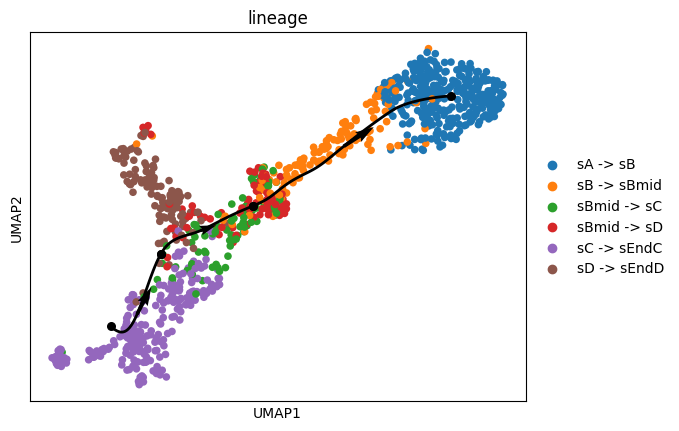

In [5]:
cfe.plot.plot_trajectory(fadata, basis="umap", color="lineage")

In [6]:
dict(fadata.milestone_wrapper)

{'id': '20241218_162522__MilestoneWrapper__9dBHYydAN2',
 'milestone_network':           from           to  length  directed
 0  MILESTONE_1  MILESTONE_4  2.9542      True
 1  MILESTONE_4  MILESTONE_3  4.0815      True
 2  MILESTONE_3  MILESTONE_2  8.3298      True,
 'id_list': ['1', '4', '3', '2'],
 'divergence_regions': Empty DataFrame
 Columns: [divergence_id, milestone_id, is_start]
 Index: [],
 'cell_id_list': ['1',
  '10',
  '100',
  '1000',
  '101',
  '102',
  '103',
  '104',
  '105',
  '106',
  '107',
  '108',
  '109',
  '11',
  '110',
  '111',
  '112',
  '113',
  '114',
  '115',
  '116',
  '117',
  '118',
  '119',
  '12',
  '120',
  '121',
  '122',
  '123',
  '124',
  '125',
  '126',
  '127',
  '128',
  '129',
  '13',
  '130',
  '131',
  '132',
  '133',
  '134',
  '135',
  '136',
  '137',
  '138',
  '139',
  '14',
  '140',
  '141',
  '142',
  '143',
  '144',
  '145',
  '146',
  '147',
  '148',
  '149',
  '15',
  '150',
  '151',
  '152',
  '153',
  '154',
  '155',
  '156',
  '15

In [7]:
dict(fadata.uns["cfe"]["waypoint_wrapper"])

{'id': '20241218_162522__WaypointWrapper__C81mRpxuSU',
 'milestone_wrapper': <cfe.data.fate_milestone_wrapper.MilestoneWrapper at 0x7276bd385de0>,
 'waypoint_progressions':     from to  percentage           waypoint_id
 0      1  4    0.000000  MILESTONE_BEGIN_W1_4
 1      1  4    0.026006                    W2
 2      1  4    0.052012                    W3
 3      1  4    0.078019                    W4
 4      1  4    0.104025                    W5
 ..   ... ..         ...                   ...
 200    3  2    0.968437                  W201
 201    3  2    0.977660                  W202
 202    3  2    0.986884                  W203
 203    3  2    0.996107                  W204
 204    3  2    1.000000    MILESTONE_END_W3_2
 
 [205 rows x 4 columns],
 'id_list': ['MILESTONE_BEGIN_W1_4',
  'W2',
  'W3',
  'W4',
  'W5',
  'W6',
  'W7',
  'W8',
  'W9',
  'W10',
  'W11',
  'W12',
  'W13',
  'W14',
  'W15',
  'W16',
  'W17',
  'W18',
  'W19',
  'W20',
  'W21',
  'W22',
  'W23',
  'W24',
 